## Import Libraries & Set columns to "all"

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import math

In [61]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format

## Import Data

In [62]:
melbourne = pd.read_csv('melbourne_train_set.csv')

In [63]:
melbourne.head(3)

,suburb,address,rooms,type,price_$aus,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade,price_$aus_bracket
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2,3067,2,1,1,202,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,December,1970s,1480000
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2,3067,2,1,0,156,79,1900,Yarra,-38,145,Northern Metropolitan,4019,Bloomburg St,2016,February,1900s,1040000
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2,3067,3,2,0,134,150,1900,Yarra,-38,145,Northern Metropolitan,4019,Charles St,2017,March,1900s,1460000


In [64]:
melbourne = melbourne[melbourne['suburb'].isin(melbourne['suburb'].value_counts()[melbourne['suburb'].value_counts() > 4].index)].reset_index(drop = True)

## Clean & Transform Data

Create a function to clean the data, outputting the new, prepared dataframe, ready for descriptive analysis, or a model, should it require

In [65]:
def cleaningdata(x):
    
    #transform date column to datetime
    x['date'] = pd.to_datetime(x['date'], format = '%Y-%m-%d')
    
    #change year to string
    x['year'] = x['year'].astype(str)
    x['yearbuilt'] = x['yearbuilt'].astype(str)
    
    
    
    return x

In [66]:
#call function and apply it to df
mh = cleaningdata(melbourne)
mh['price_$aus'] = mh['price_$aus'].astype(int)

In [67]:
mh.head(5)

,suburb,address,rooms,type,price_$aus,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade,price_$aus_bracket
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2,3067,2,1,1,202,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,December,1970s,1480000
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2,3067,2,1,0,156,79,1900,Yarra,-38,145,Northern Metropolitan,4019,Bloomburg St,2016,February,1900s,1040000
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2,3067,3,2,0,134,150,1900,Yarra,-38,145,Northern Metropolitan,4019,Charles St,2017,March,1900s,1460000
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2,3067,3,2,1,94,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Federation La,2017,March,1970s,850000
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2,3067,3,1,2,120,142,2014,Yarra,-38,145,Northern Metropolitan,4019,Park St,2016,June,2010s,1600000


## EDA

### Dealing with Outliers

In [68]:
#check for outliers.

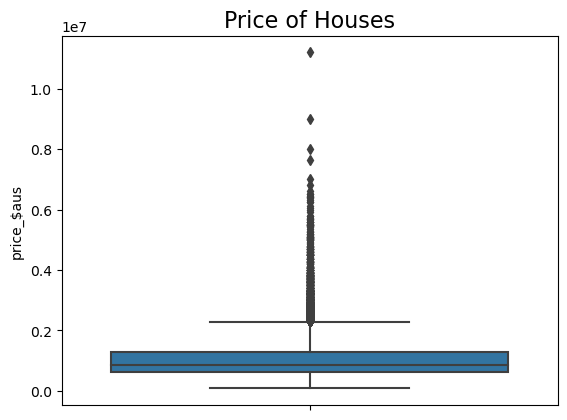

In [69]:
sns.boxplot(y=mh['price_$aus'])
plt.title('Price of Houses', fontsize=16)
plt.show()

*If the boxplot shows some extreme outliers, find the interquartile range and decide how to deal with them. The quartiles and IQR can be calculated as follows*

### We can also filter our dataframe to a reasonable extent. removing any true outliers

In [70]:
mh['price_$aus'].max()

11200000

In [71]:
mh_ml = mh[mh['price_$aus'] < 5000000]

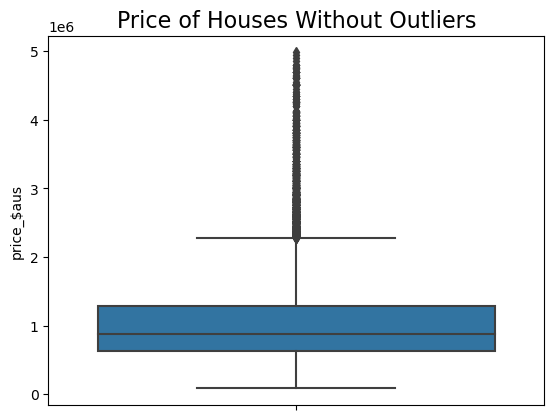

In [72]:
sns.boxplot(y=mh_ml['price_$aus'])
plt.title('Price of Houses Without Outliers', fontsize=16)
plt.show()

## Feature Selection

The idea of feature selection is that you don't have too much multicolinearity, which could **give the algorithm away to the model**. Generally, the rule is that anything above 0.85-0.90 will need to be extensively reviewed before feeding it into the model, and one of the offending columns dropped. 

### Option A: A lower number of columns
**you have around 30 columns, in which the most appropriate features can be visualised and digested within a heatmap**

In [73]:
#to check the correlation
mh_ml.select_dtypes(include=np.number).corr()

,rooms,price_$aus,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,lat,long,propertycount,price_$aus_bracket
rooms,1,0,0,0,1,1,0,0,0,0,0,-0,0
price_$aus,0,1,-0,0,0,0,0,0,0,-0,0,-0,1
distancefromcentre(miles),0,-0,1,0,0,0,0,0,0,-0,0,-0,-0
postcode,0,0,0,1,0,0,0,0,0,-0,0,0,0
bedroom2,1,0,0,0,1,1,0,0,0,0,0,-0,0
bathroom,1,0,0,0,1,1,0,0,0,-0,0,-0,0
car,0,0,0,0,0,0,1,0,0,-0,0,-0,0
landsize,0,0,0,0,0,0,0,1,0,0,-0,-0,0
buildingarea,0,0,0,0,0,0,0,0,1,0,-0,-0,0
lat,0,-0,-0,-0,0,-0,-0,0,0,1,-0,0,-0


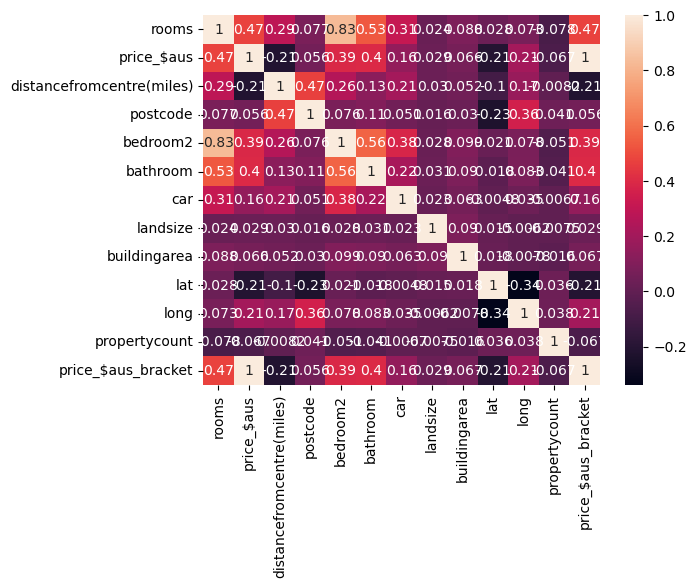

In [74]:
#clearer version of the above
correlations_matrix = mh_ml.select_dtypes(include=np.number).corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

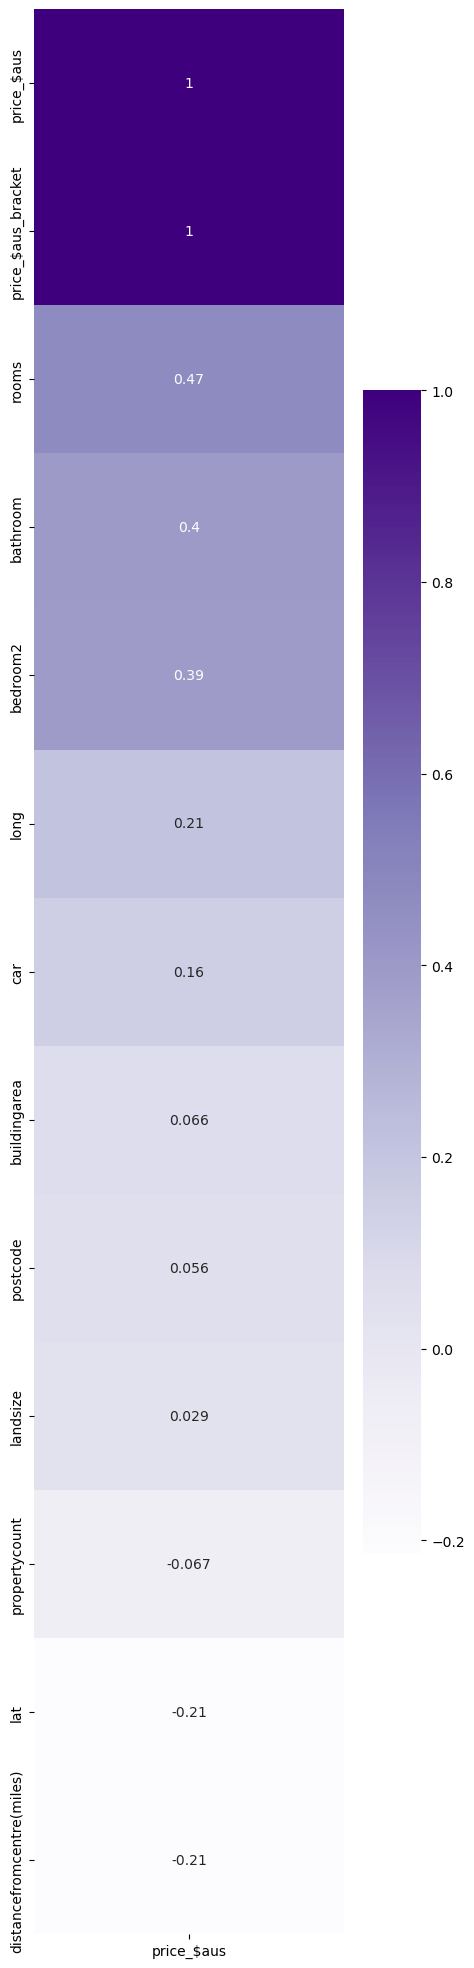

In [75]:
#Visualise the Correlation of columns in a vertical heatmap. this is useful for the number of features on the higher end of the spectrum
corr = mh_ml.select_dtypes(include=np.number).corr().loc[:,['price_$aus']]
fig, ax = plt.subplots(figsize=(5,25))
ax = sns.heatmap(corr.sort_values(by=['price_$aus'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Purples")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)
plt.show()

In [76]:
mh_ml.columns

Index(['suburb', 'address', 'rooms', 'type', 'price_$aus', 'method', 'sellerg',
       'date', 'distancefromcentre(miles)', 'postcode', 'bedroom2', 'bathroom',
       'car', 'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lat',
       'long', 'regionname', 'propertycount', 'streetname', 'year', 'month',
       'builddecade', 'price_$aus_bracket'],
      dtype='object')

In [77]:
mh_ml = mh_ml[['suburb', 'rooms', 'type', 'price_$aus', 'method', 'sellerg', 'distancefromcentre(miles)', 'postcode', 'bedroom2', 'bathroom','car', 'landsize', 'buildingarea', 'builddecade', 'councilarea', 'regionname', 'propertycount', 'year', 'month']]

# Building the model

## Xy Split

In [78]:
y = mh_ml['price_$aus']
X = mh_ml.drop(columns = ["price_$aus"], axis = 1)

## Train Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42) # default split ratio is 80/20

In [80]:
len(X_test)

1355

## Categorical, Numerical Split

In [81]:
#split train data
X_train_numerical =   X_train[['rooms','distancefromcentre(miles)','bedroom2', 'bathroom','car', 'landsize', 'buildingarea']]
X_train_categorical = X_train[['suburb', 'type', 'method', 'postcode', 'builddecade', 'councilarea', 'regionname']]


#split test data
X_test_numerical =   X_test[['rooms','distancefromcentre(miles)','bedroom2', 'bathroom','car', 'landsize', 'buildingarea']]
X_test_categorical = X_test[['suburb', 'type', 'method', 'postcode', 'builddecade', 'councilarea', 'regionname']]

## Dealing with numericals

- **Min-max scaler**
    - squish the data so that the smallest value is 0 and the highest value is 1 (put the data on a scale from 0 to 1)

In [82]:
#Fit ONLY the train set.
MinMaxtransformer = MinMaxScaler().fit(X_train_numerical)

#Train
X_train_normalized = MinMaxtransformer.transform(X_train_numerical)
X_train_minmax = pd.DataFrame(X_train_normalized,columns=X_train_numerical.columns)
#X_train_minmax.head()

#Test
X_test_normalized = MinMaxtransformer.transform(X_test_numerical)
X_test_minmax = pd.DataFrame(X_test_normalized,columns=X_test_numerical.columns)
#X_test_minmax.head()

In [83]:
display(X_train_minmax.head())
display(X_train_minmax.shape)

,rooms,distancefromcentre(miles),bedroom2,bathroom,car,landsize,buildingarea
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


(25728, 7)

In [84]:
display(X_test_minmax.head())
display(X_test_minmax.shape)

,rooms,distancefromcentre(miles),bedroom2,bathroom,car,landsize,buildingarea
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


(1355, 7)

## Dealing with categorical data

### OneHot Encoding

In [85]:
#Fit ONLY the train set. 
encoder = OneHotEncoder(drop='first').fit(X_train_categorical)


#Train
encoded_for_p_train = encoder.transform(X_train_categorical).toarray()
cols = encoder.get_feature_names(input_features=X_train_categorical.columns)
X_train_ohe = pd.DataFrame(encoded_for_p_train, columns=cols)
#X_train_ohe.head()


#Test
encoded_for_p_test = encoder.transform(X_test_categorical).toarray()
cols = encoder.get_feature_names(input_features=X_test_categorical.columns)
X_test_ohe = pd.DataFrame(encoded_for_p_test, columns=cols)
#X_test_ohe.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
display(X_train_ohe.head())
display(X_train_ohe.shape)

,suburb_Aberfeldie,suburb_Airport west,suburb_Albanvale,suburb_Albert park,suburb_Albion,suburb_Alphington,suburb_Altona,suburb_Altona meadows,suburb_Altona north,suburb_Ardeer,suburb_Armadale,suburb_Ascot vale,suburb_Ashburton,suburb_Ashwood,suburb_Aspendale,suburb_Aspendale gardens,suburb_Attwood,suburb_Avondale heights,suburb_Balaclava,suburb_Balwyn,suburb_Balwyn north,suburb_Bayswater,suburb_Bayswater north,suburb_Beaumaris,suburb_Bellfield,suburb_Bentleigh,suburb_Bentleigh east,suburb_Berwick,suburb_Black rock,suburb_Blackburn,suburb_Blackburn north,suburb_Blackburn south,suburb_Bonbeach,suburb_Boronia,suburb_Box hill,suburb_Braybrook,suburb_Briar hill,suburb_Brighton,suburb_Brighton east,suburb_Broadmeadows,suburb_Brooklyn,suburb_Brunswick,suburb_Brunswick east,suburb_Brunswick west,suburb_Bulleen,suburb_Bullengarook,suburb_Bundoora,suburb_Burnley,suburb_Burnside,suburb_Burnside heights,suburb_Burwood,suburb_Burwood east,suburb_Cairnlea,suburb_Camberwell,suburb_Campbellfield,suburb_Canterbury,suburb_Carlton,suburb_Carlton north,suburb_Carnegie,suburb_Caroline springs,suburb_Carrum,suburb_Carrum downs,suburb_Caulfield,suburb_Caulfield east,suburb_Caulfield north,suburb_Caulfield south,suburb_Chadstone,suburb_Chelsea,suburb_Chelsea heights,suburb_Cheltenham,suburb_Chirnside park,suburb_Clarinda,suburb_Clayton,suburb_Clayton south,suburb_Clifton hill,suburb_Coburg,suburb_Coburg north,suburb_Collingwood,suburb_Coolaroo,suburb_Craigieburn,suburb_Cranbourne,suburb_Cremorne,suburb_Croydon,suburb_Croydon hills,suburb_Croydon north,suburb_Croydon south,suburb_Dallas,suburb_Dandenong,suburb_Dandenong north,suburb_Deepdene,suburb_Deer park,suburb_Delahey,suburb_Derrimut,suburb_Diamond creek,suburb_Diggers rest,suburb_Dingley village,suburb_Docklands,suburb_Doncaster,suburb_Doncaster east,suburb_Donvale,suburb_Doreen,suburb_Doveton,suburb_Eaglemont,suburb_East melbourne,suburb_Edithvale,suburb_Elsternwick,suburb_Eltham,suburb_Eltham north,suburb_Elwood,suburb_Endeavour hills,suburb_Epping,suburb_Essendon,suburb_Essendon north,suburb_Essendon west,suburb_Fairfield,suburb_Fawkner,suburb_Ferntree gully,suburb_Fitzroy,suburb_Fitzroy north,suburb_Flemington,suburb_Footscray,suburb_Forest hill,suburb_Frankston,suburb_Frankston north,suburb_Frankston south,suburb_Gardenvale,suburb_Gisborne,suburb_Gladstone park,suburb_Glen huntly,suburb_Glen iris,suburb_Glen waverley,suburb_Glenroy,suburb_Gowanbrae,suburb_Greensborough,suburb_Greenvale,suburb_Hadfield,suburb_Hallam,suburb_Hampton,suburb_Hampton east,suburb_Hampton park,suburb_Hawthorn,suburb_Hawthorn east,suburb_Heatherton,suburb_Heathmont,suburb_Heidelberg,suburb_Heidelberg heights,suburb_Heidelberg west,suburb_Highett,suburb_Hillside,suburb_Hoppers crossing,suburb_Hughesdale,suburb_Huntingdale,suburb_Ivanhoe,suburb_Ivanhoe east,suburb_Jacana,suburb_Kealba,suburb_Keilor,suburb_Keilor downs,suburb_Keilor east,suburb_Keilor lodge,suburb_Keilor park,suburb_Kensington,suburb_Kew,suburb_Kew east,suburb_Keysborough,suburb_Kilsyth,suburb_Kings park,suburb_Kingsbury,suburb_Kingsville,suburb_Knoxfield,suburb_Kooyong,suburb_Kurunjang,suburb_Lalor,suburb_Langwarrin,suburb_Laverton,suburb_Lilydale,suburb_Lower plenty,suburb_Macleod,suburb_Maidstone,suburb_Malvern,suburb_Malvern east,suburb_Maribyrnong,suburb_Mckinnon,suburb_Meadow heights,suburb_Melbourne,suburb_Melton,suburb_Melton south,suburb_Melton west,suburb_Mentone,suburb_Mernda,suburb_Mickleham,suburb_Middle park,suburb_Mill park,suburb_Mitcham,suburb_Mont albert,suburb_Montmorency,suburb_Moonee ponds,suburb_Moorabbin,suburb_Mooroolbark,suburb_Mordialloc,suburb_Mount waverley,suburb_Mulgrave,suburb_Murrumbeena,suburb_Narre warren,suburb_New gisborne,suburb_Newport,suburb_Niddrie,suburb_Noble park,suburb_North melbourne,suburb_North warrandyte,suburb_Northcote,suburb_Notting hill,suburb_Nunawading,suburb_Oak park,suburb_Oakleigh,suburb_Oakleigh east,suburb_Oakleigh south,suburb_Ormond,suburb_Pakenham,suburb_Parkdale,suburb_Parkville,suburb_Pas

(25728, 539)

In [87]:
display(X_test_ohe.head())
display(X_test_ohe.shape)

,suburb_Aberfeldie,suburb_Airport west,suburb_Albanvale,suburb_Albert park,suburb_Albion,suburb_Alphington,suburb_Altona,suburb_Altona meadows,suburb_Altona north,suburb_Ardeer,suburb_Armadale,suburb_Ascot vale,suburb_Ashburton,suburb_Ashwood,suburb_Aspendale,suburb_Aspendale gardens,suburb_Attwood,suburb_Avondale heights,suburb_Balaclava,suburb_Balwyn,suburb_Balwyn north,suburb_Bayswater,suburb_Bayswater north,suburb_Beaumaris,suburb_Bellfield,suburb_Bentleigh,suburb_Bentleigh east,suburb_Berwick,suburb_Black rock,suburb_Blackburn,suburb_Blackburn north,suburb_Blackburn south,suburb_Bonbeach,suburb_Boronia,suburb_Box hill,suburb_Braybrook,suburb_Briar hill,suburb_Brighton,suburb_Brighton east,suburb_Broadmeadows,suburb_Brooklyn,suburb_Brunswick,suburb_Brunswick east,suburb_Brunswick west,suburb_Bulleen,suburb_Bullengarook,suburb_Bundoora,suburb_Burnley,suburb_Burnside,suburb_Burnside heights,suburb_Burwood,suburb_Burwood east,suburb_Cairnlea,suburb_Camberwell,suburb_Campbellfield,suburb_Canterbury,suburb_Carlton,suburb_Carlton north,suburb_Carnegie,suburb_Caroline springs,suburb_Carrum,suburb_Carrum downs,suburb_Caulfield,suburb_Caulfield east,suburb_Caulfield north,suburb_Caulfield south,suburb_Chadstone,suburb_Chelsea,suburb_Chelsea heights,suburb_Cheltenham,suburb_Chirnside park,suburb_Clarinda,suburb_Clayton,suburb_Clayton south,suburb_Clifton hill,suburb_Coburg,suburb_Coburg north,suburb_Collingwood,suburb_Coolaroo,suburb_Craigieburn,suburb_Cranbourne,suburb_Cremorne,suburb_Croydon,suburb_Croydon hills,suburb_Croydon north,suburb_Croydon south,suburb_Dallas,suburb_Dandenong,suburb_Dandenong north,suburb_Deepdene,suburb_Deer park,suburb_Delahey,suburb_Derrimut,suburb_Diamond creek,suburb_Diggers rest,suburb_Dingley village,suburb_Docklands,suburb_Doncaster,suburb_Doncaster east,suburb_Donvale,suburb_Doreen,suburb_Doveton,suburb_Eaglemont,suburb_East melbourne,suburb_Edithvale,suburb_Elsternwick,suburb_Eltham,suburb_Eltham north,suburb_Elwood,suburb_Endeavour hills,suburb_Epping,suburb_Essendon,suburb_Essendon north,suburb_Essendon west,suburb_Fairfield,suburb_Fawkner,suburb_Ferntree gully,suburb_Fitzroy,suburb_Fitzroy north,suburb_Flemington,suburb_Footscray,suburb_Forest hill,suburb_Frankston,suburb_Frankston north,suburb_Frankston south,suburb_Gardenvale,suburb_Gisborne,suburb_Gladstone park,suburb_Glen huntly,suburb_Glen iris,suburb_Glen waverley,suburb_Glenroy,suburb_Gowanbrae,suburb_Greensborough,suburb_Greenvale,suburb_Hadfield,suburb_Hallam,suburb_Hampton,suburb_Hampton east,suburb_Hampton park,suburb_Hawthorn,suburb_Hawthorn east,suburb_Heatherton,suburb_Heathmont,suburb_Heidelberg,suburb_Heidelberg heights,suburb_Heidelberg west,suburb_Highett,suburb_Hillside,suburb_Hoppers crossing,suburb_Hughesdale,suburb_Huntingdale,suburb_Ivanhoe,suburb_Ivanhoe east,suburb_Jacana,suburb_Kealba,suburb_Keilor,suburb_Keilor downs,suburb_Keilor east,suburb_Keilor lodge,suburb_Keilor park,suburb_Kensington,suburb_Kew,suburb_Kew east,suburb_Keysborough,suburb_Kilsyth,suburb_Kings park,suburb_Kingsbury,suburb_Kingsville,suburb_Knoxfield,suburb_Kooyong,suburb_Kurunjang,suburb_Lalor,suburb_Langwarrin,suburb_Laverton,suburb_Lilydale,suburb_Lower plenty,suburb_Macleod,suburb_Maidstone,suburb_Malvern,suburb_Malvern east,suburb_Maribyrnong,suburb_Mckinnon,suburb_Meadow heights,suburb_Melbourne,suburb_Melton,suburb_Melton south,suburb_Melton west,suburb_Mentone,suburb_Mernda,suburb_Mickleham,suburb_Middle park,suburb_Mill park,suburb_Mitcham,suburb_Mont albert,suburb_Montmorency,suburb_Moonee ponds,suburb_Moorabbin,suburb_Mooroolbark,suburb_Mordialloc,suburb_Mount waverley,suburb_Mulgrave,suburb_Murrumbeena,suburb_Narre warren,suburb_New gisborne,suburb_Newport,suburb_Niddrie,suburb_Noble park,suburb_North melbourne,suburb_North warrandyte,suburb_Northcote,suburb_Notting hill,suburb_Nunawading,suburb_Oak park,suburb_Oakleigh,suburb_Oakleigh east,suburb_Oakleigh south,suburb_Ormond,suburb_Pakenham,suburb_Parkdale,suburb_Parkville,suburb_Pas

(1355, 539)

### Optional : Concatenate categorically encoded dfs
If used both encoding, concatenate the dfs

In [88]:
#Reset Indices in OHE dataframes
X_train_ohe = X_train_ohe.reset_index(drop = True)
X_test_ohe = X_test_ohe.reset_index(drop = True)

## Concatenate categorically_encoded and numerically_scaled dfs

In [89]:
###Reset Indices in scaled dataframes###
X_train_minmax = X_train_minmax.reset_index(drop = True)
X_test_minmax = X_test_minmax.reset_index(drop = True)



#####Concat#####

#Train
X_train_scaled = pd.concat([X_train_minmax,X_train_ohe], axis = 1)

#Test
X_test_scaled = pd.concat([X_test_minmax,X_test_ohe], axis = 1)

## Reset the Incides of our y axes, so that they correspond to the X_train_scaled and X_test_scaled

In [90]:
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

## Fit the Linear regressor

In [91]:
#Define the linear regression model
LR = LinearRegression()

#fit the training set onto the Regressor 
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [92]:
#Predict our y results using our X_test_scaled data, which was based on the rules in our training set. This is also true for the validation set.  
y_pred = LR.predict(X_test_scaled)

In [93]:
#this shows the predicted values of the regression model, based on the features fed into the built model. 
y_pred


print(LR.intercept_) # where the regression line passes the X axis.
print(LR.coef_) #shows how each feature performed in the model, and its weighting to finding the final decision

3.431636355896738e+16
[ 2.40811717e+06 -1.91757200e+06 -5.31433301e+05  1.02465453e+06
  9.01688962e+05  1.47846346e+06  1.44239157e+06 -1.32787638e+17
 -8.29594407e+16 -2.26750002e+16 -8.40035548e+16  3.57105781e+16
  5.03990139e+16  1.30712230e+16  2.29164560e+16 -1.81222486e+16
 -9.78897625e+16  6.49825267e+16  1.24343969e+16  1.86168502e+16
  3.55335155e+16  8.31841572e+15  8.31841572e+15 -7.89733533e+15
 -2.23505307e+16  4.93038072e+15 -1.20269006e+16 -2.06250401e+16
 -1.43311629e+16 -6.21772443e+15  2.37176450e+16 -4.61612634e+15
 -7.32102677e+15  1.61002767e+16 -1.85679382e+16  2.37176450e+16
  2.34615498e+15  2.34615498e+15  2.34615498e+15  3.72609951e+15
 -1.60314585e+16 -9.16645578e+15 -4.75826249e+14 -1.89934376e+16
  1.32152138e+16  1.39947835e+16 -7.42938471e+15 -1.43140672e+16
  9.64578587e+15  1.12762005e+16  1.84401436e+16 -1.35441309e+16
  1.08986247e+14  4.35614828e+16 -1.16865843e+16  1.82275796e+16
  1.82275796e+16  3.82260173e+15 -2.48637989e+15 -1.78398257e+16
  4

## Reading the results of our model

The R2 score is a useful measure, that can determine the fit of our model. 

In [94]:
train_r2 = LR.score(X_train_scaled, y_train)
test_r2 = LR.score(X_test_scaled, y_test)
print (f'Train R2: {train_r2} \nTest R2: {test_r2}')

Train R2: 0.697996120468485 
Test R2: 0.6903859738799321


The MSE represents the **Mean Squared Error**, which shows the average of the squared differences between the predicted and actual vales. The lower the score, the better the prediction was. 

In [95]:
train_mse=mean_squared_error(LR.predict(X_train_scaled), y_train)
test_mse=mean_squared_error(LR.predict(X_test_scaled), y_test)
print(f'Train MSE: {train_mse} \nTest MSE: {test_mse}')

Train MSE: 108218900494.07439 
Test MSE: 118567991898.34244


The RMSE represents the **Root Mean Squared Error**, which shows the root of the average of the squared differences between the predicted and actual vales. The lower the score, the better the prediction was. 

In [96]:
rmse = np.sqrt(test_mse)
rmse

344337.0324236742

In [97]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [98]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
        for model in models:
            model.fit(X_train_scaled,y_train)
            print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [99]:
model_list = [LinReg(), SGDRegressor(), KNeighborsRegressor(), MLPRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor()]
models_automation(model_list, X_train_scaled, y_train, X_test_scaled, y_test)

LinearRegression: Train -> 0.697996120468485, Test -> 0.6903859738799321
SGDRegressor: Train -> 0.6949355030190157, Test -> 0.6890898625951553
KNeighborsRegressor: Train -> 0.7758813025290797, Test -> 0.6611720113413757


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> -1.3571288352370314, Test -> -1.321433383564381
DecisionTreeRegressor: Train -> 0.9788420444630226, Test -> 0.7085064236989005
RandomForestRegressor: Train -> 0.9542421510332073, Test -> 0.8174944000927086
HistGradientBoostingRegressor: Train -> 0.8356518158504644, Test -> 0.8228703329870317
GradientBoostingRegressor: Train -> 0.7630906117260439, Test -> 0.7795363550951802


In [100]:
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor()
reg2 = RandomForestRegressor()
reg3 = DecisionTreeRegressor()
reg4 = HistGradientBoostingRegressor()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('dt', reg3),('hgb', reg4)])
ereg = ereg.fit(X_train_scaled, y_train)

print("Train R2",ereg.score(X_train_scaled, y_train))
print("Test R2",ereg.score(X_test_scaled, y_test))

Train R2 0.9223076769678454
Test R2 0.8195471806519747


In [101]:
y_pred = ereg.predict(X_test_scaled)



In [102]:
train_mse=mean_squared_error(ereg.predict(X_train_scaled), y_train)
test_mse=mean_squared_error(ereg.predict(X_test_scaled), y_test)
print(f'Train MSE: {train_mse} \nTest MSE: {test_mse}')

Train MSE: 27839966123.656498 
Test MSE: 69105165197.49785


In [103]:
rmse = np.sqrt(test_mse)
rmse

262878.6130469686

In [104]:
y_pred

array([1270124.42641742,  675773.46086391,  655226.69383641, ...,
        975889.85878441,  785898.40792404, 1851975.72166788])

### assign prices to our validation set

In [124]:
mel = pd.read_csv('melbourne_validation_set.csv')

In [125]:
mel = mel.drop(columns='price_$aus')

In [126]:
droplist = ['Warranwood', 'Cranbourne north', 'Beaconsfield', 'Clyde north', 'Guys hill', 'Emerald', 'Wonga park', 'Rockbank', 'Lysterfield', 'Avonsleigh', 'Sandhurst', 'Riddells creek', 'Montrose', 'Officer', 'Menzies creek', 'Belgrave', 'Waterways', 'Hopetoun park', 'Darley', 'The basin', 'Olinda', 'Tecoma']
droplistmeth = ['SS', 'W', 'SN', 'PN']

def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

mel = filter_rows_by_values(mel, 'suburb', droplist)
mel = filter_rows_by_values(mel, 'method', droplistmeth)

mel.reset_index(drop = True)

,suburb,address,rooms,type,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade
0,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,2016-02-04,2,3067,3,2,1,0,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Victoria St,2016,February,1970s
1,Abbotsford,53 Turner St,2,h,S,Biggin,2016-08-06,2,3067,4,1,2,201,148,1900,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,August,1900s
2,Abbotsford,99 Turner St,2,h,S,Collins,2016-08-06,2,3067,3,2,1,202,148,1900,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,August,1900s
3,Abbotsford,121/56 Nicholson St,2,u,PI,Biggin,2016-11-07,2,3067,2,2,1,4292,82,2009,Yarra,-38,145,Northern Metropolitan,4019,Nicholson St,2016,November,2000s
4,Abbotsford,2 Rich St,2,h,SP,Biggin,2016-12-10,2,3067,2,1,1,176,80,1925,Yarra,-38,145,Northern Metropolitan,4019,Rich St,2016,December,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,Vermont south,28 Tullimbar Cct,3,h,S,Jellis,2018-02-24,17,3133,3,2,2,655,148,1970,Whitehorse,-38,145,Eastern Metropolitan,4280,Tullimbar Cct,2018,February,1970s
5752,Werribee,160 Shaws Rd,2,h,PI,YPA,2018-02-24,15,3030,2,1,1,796,98,1975,Wyndham,-38,145,Western Metropolitan,16166,Shaws Rd,2018,February,1970s
5753,West melbourne,9/11 Anderson St,3,u,S,hockingstuart,2018-02-24,3,3003,3,1,2,557,148,1970,Melbourne,-38,145,Northern Metropolitan,2230,Anderson St,2018,February,1970s
5754,Wheelers hill,20 Mill Ct,3,h,S,Barry,2018-02-24,17,3150,3,2,2,677,148,1970,Monash,-38,145,South-Eastern Metropolitan,7392,Mill Ct,2018,February,1970s


In [127]:
mh_v = cleaningdata(mel)
mel_v = cleaningdata(mel)


mh_v = mh_v[['suburb', 'rooms', 'type', 'method', 'sellerg', 'distancefromcentre(miles)', 'postcode', 'bedroom2', 'bathroom','car', 'landsize', 'buildingarea', 'builddecade', 'councilarea', 'regionname', 'propertycount', 'year', 'month']]



###Xy Split###

X_v = mh_v

###Cat/Num Split###

X_v_numerical =   X_v[['rooms','distancefromcentre(miles)','bedroom2', 'bathroom','car', 'landsize', 'buildingarea']]
X_v_categorical = X_v[['suburb', 'type', 'method', 'postcode', 'builddecade', 'councilarea', 'regionname']]


###Scale###
X_v_normalized = MinMaxtransformer.transform(X_v_numerical)
X_v_minmax = pd.DataFrame(X_v_normalized,columns=X_v_numerical.columns)



###Encode Categorical###
encoded_for_p_test = encoder.transform(X_v_categorical).toarray()
cols = encoder.get_feature_names(input_features=X_v_categorical.columns)
X_v_ohe = pd.DataFrame(encoded_for_p_test, columns=cols)


###Concat###
X_v_ohe = X_v_ohe.reset_index(drop = True)
X_v_minmax = X_v_minmax.reset_index(drop = True)


X_v_scaled = pd.concat([X_v_minmax,X_v_ohe], axis = 1)


###Predict###
y_pred = ereg.predict(X_v_scaled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [146]:
mel_v['price_$aus'] = y_pred
mel_v['price_$aus'] = round(mel_v['price_$aus'],-3)

In [147]:
mel_v

,suburb,address,rooms,type,price_$aus,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade
1,Abbotsford,18/659 Victoria St,3,u,1045000,VB,Rounds,2016-02-04,2,3067,3,2,1,0,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Victoria St,2016,February,1970s
3,Abbotsford,53 Turner St,2,h,1267000,S,Biggin,2016-08-06,2,3067,4,1,2,201,148,1900,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,August,1900s
4,Abbotsford,99 Turner St,2,h,1320000,S,Collins,2016-08-06,2,3067,3,2,1,202,148,1900,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,August,1900s
5,Abbotsford,121/56 Nicholson St,2,u,703000,PI,Biggin,2016-11-07,2,3067,2,2,1,4292,82,2009,Yarra,-38,145,Northern Metropolitan,4019,Nicholson St,2016,November,2000s
7,Abbotsford,2 Rich St,2,h,1043000,SP,Biggin,2016-12-10,2,3067,2,1,1,176,80,1925,Yarra,-38,145,Northern Metropolitan,4019,Rich St,2016,December,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7600,Vermont south,28 Tullimbar Cct,3,h,1081000,S,Jellis,2018-02-24,17,3133,3,2,2,655,148,1970,Whitehorse,-38,145,Eastern Metropolitan,4280,Tullimbar Cct,2018,February,1970s
7603,Werribee,160 Shaws Rd,2,h,604000,PI,YPA,2018-02-24,15,3030,2,1,1,796,98,1975,Wyndham,-38,145,Western Metropolitan,16166,Shaws Rd,2018,February,1970s
7604,West melbourne,9/11 Anderson St,3,u,907000,S,hockingstuart,2018-02-24,3,3003,3,1,2,557,148,1970,Melbourne,-38,145,Northern Metropolitan,2230,Anderson St,2018,February,1970s
7606,Wheelers hill,20 Mill Ct,3,h,1066000,S,Barry,2018-02-24,17,3150,3,2,2,677,148,1970,Monash,-38,145,South-Eastern Metropolitan,7392,Mill Ct,2018,February,1970s


In [148]:
mel1 = pd.read_csv('melbourne_train_set.csv')

In [149]:
mel1

,suburb,address,rooms,type,price_$aus,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2,3067,2,1,1,202,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,December,1970s
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2,3067,2,1,0,156,79,1900,Yarra,-38,145,Northern Metropolitan,4019,Bloomburg St,2016,February,1900s
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2,3067,3,2,0,134,150,1900,Yarra,-38,145,Northern Metropolitan,4019,Charles St,2017,March,1900s
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2,3067,3,2,1,94,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Federation La,2017,March,1970s
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2,3067,3,1,2,120,142,2014,Yarra,-38,145,Northern Metropolitan,4019,Park St,2016,June,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,Yarraville,13 Burns St,4,h,1480000,PI,Jas,2018-02-24,6,3013,4,1,3,593,148,1970,Maribyrnong,-38,145,Western Metropolitan,6543,Burns St,2018,February,1970s
27240,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,2018-02-24,6,3013,2,2,1,98,104,2018,Maribyrnong,-38,145,Western Metropolitan,6543,Murray St,2018,February,2010s
27241,Yarraville,147A Severn St,2,t,705000,S,Jas,2018-02-24,6,3013,2,1,2,220,120,2000,Maribyrnong,-38,145,Western Metropolitan,6543,Severn St,2018,February,2000s
27242,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,2018-02-24,6,3013,3,1,2,557,148,1970,Maribyrnong,-38,145,Western Metropolitan,6543,Stephen St,2018,February,1970s


In [150]:
cols = list(mel1.columns)

In [151]:
mel_v = mel_v[cols]

In [152]:
mel_comp = pd.concat([mel1,mel_v], axis = 0).reset_index(drop = True)

In [153]:
mel_comp.isna().sum()

suburb                       0
address                      0
rooms                        0
type                         0
price_$aus                   0
method                       0
sellerg                      0
date                         0
distancefromcentre(miles)    0
postcode                     0
bedroom2                     0
bathroom                     0
car                          0
landsize                     0
buildingarea                 0
yearbuilt                    0
councilarea                  0
lat                          0
long                         0
regionname                   0
propertycount                0
streetname                   0
year                         0
month                        0
builddecade                  0
dtype: int64

In [154]:
mel_comp

,suburb,address,rooms,type,price_$aus,method,sellerg,date,distancefromcentre(miles),postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lat,long,regionname,propertycount,streetname,year,month,builddecade
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2,3067,2,1,1,202,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Turner St,2016,December,1970s
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2,3067,2,1,0,156,79,1900,Yarra,-38,145,Northern Metropolitan,4019,Bloomburg St,2016,February,1900s
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2,3067,3,2,0,134,150,1900,Yarra,-38,145,Northern Metropolitan,4019,Charles St,2017,March,1900s
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2,3067,3,2,1,94,148,1970,Yarra,-38,145,Northern Metropolitan,4019,Federation La,2017,March,1970s
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2,3067,3,1,2,120,142,2014,Yarra,-38,145,Northern Metropolitan,4019,Park St,2016,June,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,Vermont south,28 Tullimbar Cct,3,h,1081000,S,Jellis,2018-02-24 00:00:00,17,3133,3,2,2,655,148,1970,Whitehorse,-38,145,Eastern Metropolitan,4280,Tullimbar Cct,2018,February,1970s
32996,Werribee,160 Shaws Rd,2,h,604000,PI,YPA,2018-02-24 00:00:00,15,3030,2,1,1,796,98,1975,Wyndham,-38,145,Western Metropolitan,16166,Shaws Rd,2018,February,1970s
32997,West melbourne,9/11 Anderson St,3,u,907000,S,hockingstuart,2018-02-24 00:00:00,3,3003,3,1,2,557,148,1970,Melbourne,-38,145,Northern Metropolitan,2230,Anderson St,2018,February,1970s
32998,Wheelers hill,20 Mill Ct,3,h,1066000,S,Barry,2018-02-24 00:00:00,17,3150,3,2,2,677,148,1970,Monash,-38,145,South-Eastern Metropolitan,7392,Mill Ct,2018,February,1970s


In [155]:
mel_comp = cleaningdata(mel_comp)

In [156]:
mel_comp.to_csv('melbourne_housing_price_predicted.csv',index = False)